In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd

In [2]:
df_data = ImageDataGenerator(validation_split=0.3)
train_data = df_data.flow_from_directory(directory='./images', target_size=(224,224), subset='training', shuffle=True)
test_data = df_data.flow_from_directory(directory='./images', target_size=(224,224), subset='validation', shuffle=True)

Found 91 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [3]:
test_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [4]:
VGG16 = keras.applications.VGG16(input_shape=(224,224,3), include_top=False, weights='imagenet')
VGG16.trainable = False

In [5]:
model = Sequential([
    VGG16,
    Flatten(),
    Dense(256,activation='relu'),
    Dense(256,activation='relu'),
    Dense(2,activation='sigmoid'),
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# model.build(input_shape=(None, 224,224,3)) 
# model.summary()

In [7]:
hist = model.fit(train_data, validation_data=test_data, epochs=5, batch_size=1)

c:\users\mehul\appdata\local\programs\python\python38\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/5
3/3 [==============================] - 32s 6s/step - loss: 19.6114 - accuracy: 0.4606 - val_loss: 6.6377 - val_accuracy: 0.7949
Epoch 2/5
3/3 [==============================] - 3s 930ms/step - loss: 2.9196 - accuracy: 0.9163 - val_loss: 11.2482 - val_accuracy: 0.8718
Epoch 3/5
3/3 [==============================] - 2s 970ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.6659 - val_accuracy: 0.8205
Epoch 4/5
3/3 [==============================] - 3s 917ms/step - loss: 0.1330 - accuracy: 0.9945 - val_loss: 11.6344 - val_accuracy: 0.7692
Epoch 5/5
3/3 [==============================] - 3s 896ms/step - loss: 0.1287 - accuracy: 0.9828 - val_loss: 10.4715 - val_accuracy: 0.8974


In [8]:
# model.save('vgg16_cat_or_dog.h5', model)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 21,203,778
Trainable params: 6,489,090
Non-trainable params: 14,714,688
_________________________________________________________________


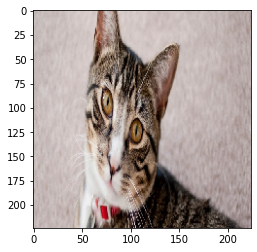

In [10]:
import matplotlib.pyplot as plt
img = keras.preprocessing.image.load_img('./images/cat/What to do if your cat is marking....jpg', target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)

In [11]:
img = np.expand_dims(img, axis=0)

In [12]:
# saved_model = keras.models.load_model('vgg16_cat_or_dog.h5')

In [16]:
output = model.predict(img)
output[0][1]

0.0

In [17]:
if output[0][0] > output[0][1]:
    print('cat')
else:
    print('dog')

cat
